In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
table = pd.read_csv("kwyk_openneuro.csv")
table["kwyk_uncertainty"]= table["kwyk_uncertainty"].replace(['Nan'], np.nan)
table

,ID,kwyk_uncertainty
0,ds001818_sub-041_ses-01_T1w,0.26649404322077136
1,ds001818_sub-016_ses-01_T1w,0.31312517886368185
2,ds001818_sub-013_ses-01_T1w,0.2693698384471937
3,ds001818_sub-006_ses-01_T1w,0.2547707859337624
4,ds001818_sub-031_ses-02_T1w,0.2622491194746816
...,...,...
22987,ds001365_sub-06_T1w,NaN
22988,ds001365_sub-11_T1w,NaN
22989,ds001365_sub-04_T1w,NaN
22990,ds001365_sub-32_T1w,NaN


In [3]:
# count the Nan values
table["kwyk_uncertainty"].isna().sum()

4304

In [4]:
df = table.dropna()
df

,ID,kwyk_uncertainty
0,ds001818_sub-041_ses-01_T1w,0.26649404322077136
1,ds001818_sub-016_ses-01_T1w,0.31312517886368185
2,ds001818_sub-013_ses-01_T1w,0.2693698384471937
3,ds001818_sub-006_ses-01_T1w,0.2547707859337624
4,ds001818_sub-031_ses-02_T1w,0.2622491194746816
...,...,...
22952,ds003433_sub-17_ses-01_T1w,0.2636877176543311
22953,ds003433_sub-07_ses-01_T1w,0.2880334926599913
22954,ds003433_sub-06_ses-01_T1w,0.2281795651621193
22955,ds003433_sub-11_ses-01_T1w,0.26292655990077035


In [5]:
df[["dataset", "ID"]] = df['ID'].str.split("_",n=1,expand= True)
df = df[['dataset', 'ID', 'kwyk_uncertainty']]
df

/Users/hoda/miniconda3/lib/python3.7/site-packages/pandas/core/frame.py:3636: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


,dataset,ID,kwyk_uncertainty
0,ds001818,sub-041_ses-01_T1w,0.26649404322077136
1,ds001818,sub-016_ses-01_T1w,0.31312517886368185
2,ds001818,sub-013_ses-01_T1w,0.2693698384471937
3,ds001818,sub-006_ses-01_T1w,0.2547707859337624
4,ds001818,sub-031_ses-02_T1w,0.2622491194746816
...,...,...,...
22952,ds003433,sub-17_ses-01_T1w,0.2636877176543311
22953,ds003433,sub-07_ses-01_T1w,0.2880334926599913
22954,ds003433,sub-06_ses-01_T1w,0.2281795651621193
22955,ds003433,sub-11_ses-01_T1w,0.26292655990077035


In [6]:
df["kwyk_uncertainty"] = df["kwyk_uncertainty"].astype("float32")
df.dtypes

dataset              object
ID                   object
kwyk_uncertainty    float32
dtype: object

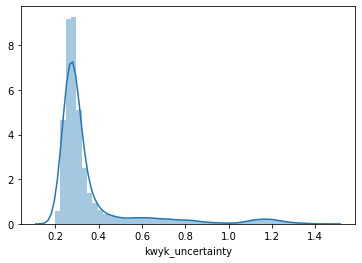

In [7]:
sns.distplot(df["kwyk_uncertainty"])

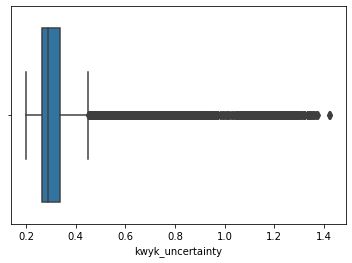

In [8]:
sns.boxplot(df["kwyk_uncertainty"])

In [9]:
# how many datasets we have?
df["dataset"].unique().shape

(365,)

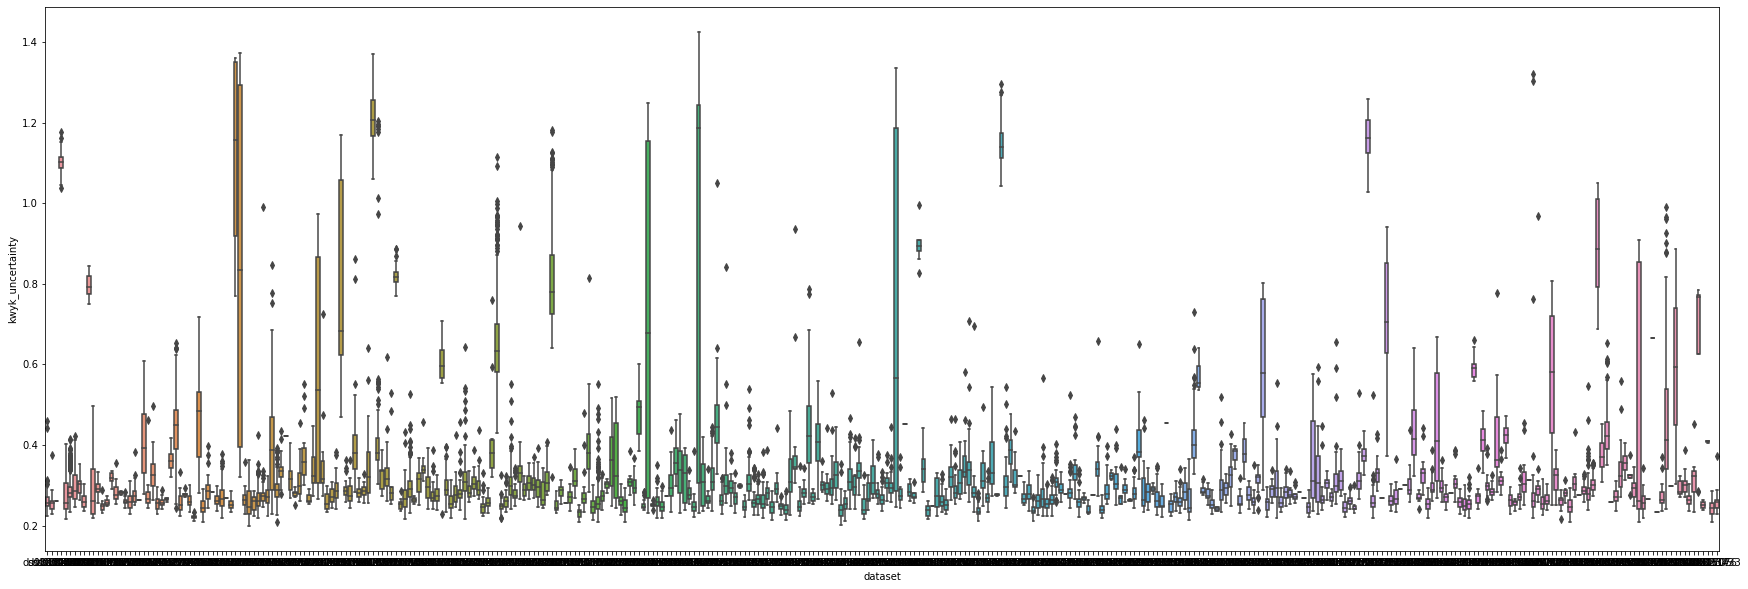

In [10]:
import matplotlib.pyplot as plt
f, ax = plt.subplots(figsize=(30, 10))
sns.boxplot(x="dataset",y="kwyk_uncertainty",data = df)

In [11]:
sorted_ds = df.groupby(["dataset"])["kwyk_uncertainty"].median().sort_values().index
sorted_ds

Index(['ds002674', 'ds001415', 'ds002543', 'ds002750', 'ds003439', 'ds001338',
       'ds001927', 'ds003495', 'ds002207', 'ds003542',
       ...
       'ds000053', 'ds001942', 'ds001875', 'ds001497', 'ds002940', 'ds003468',
       'ds002295', 'ds002307', 'ds001242', 'ds003027'],
      dtype='object', name='dataset', length=365)

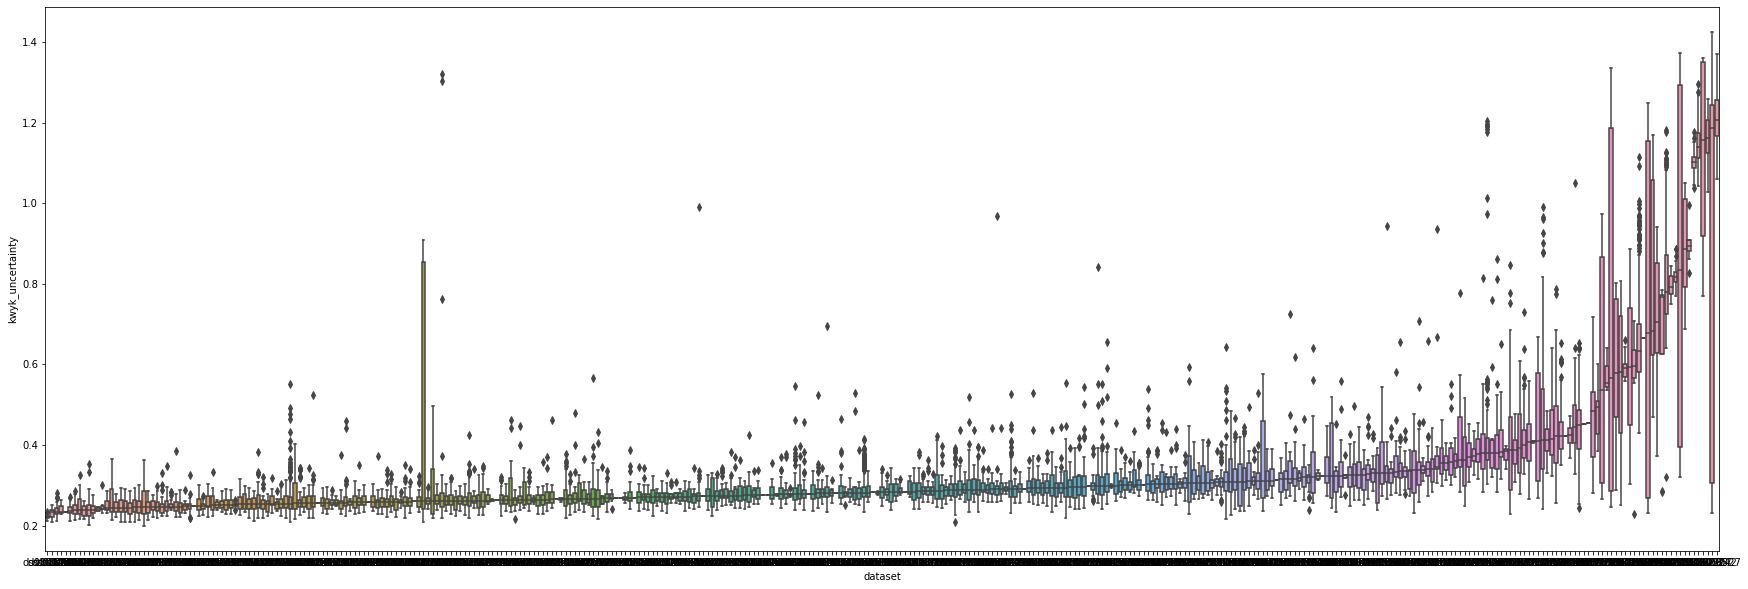

In [12]:
f, ax = plt.subplots(figsize=(30, 10))
sns.boxplot(x="dataset",y="kwyk_uncertainty",data = df, order = sorted_ds)

Text(0, 0.5, 'Datasets')

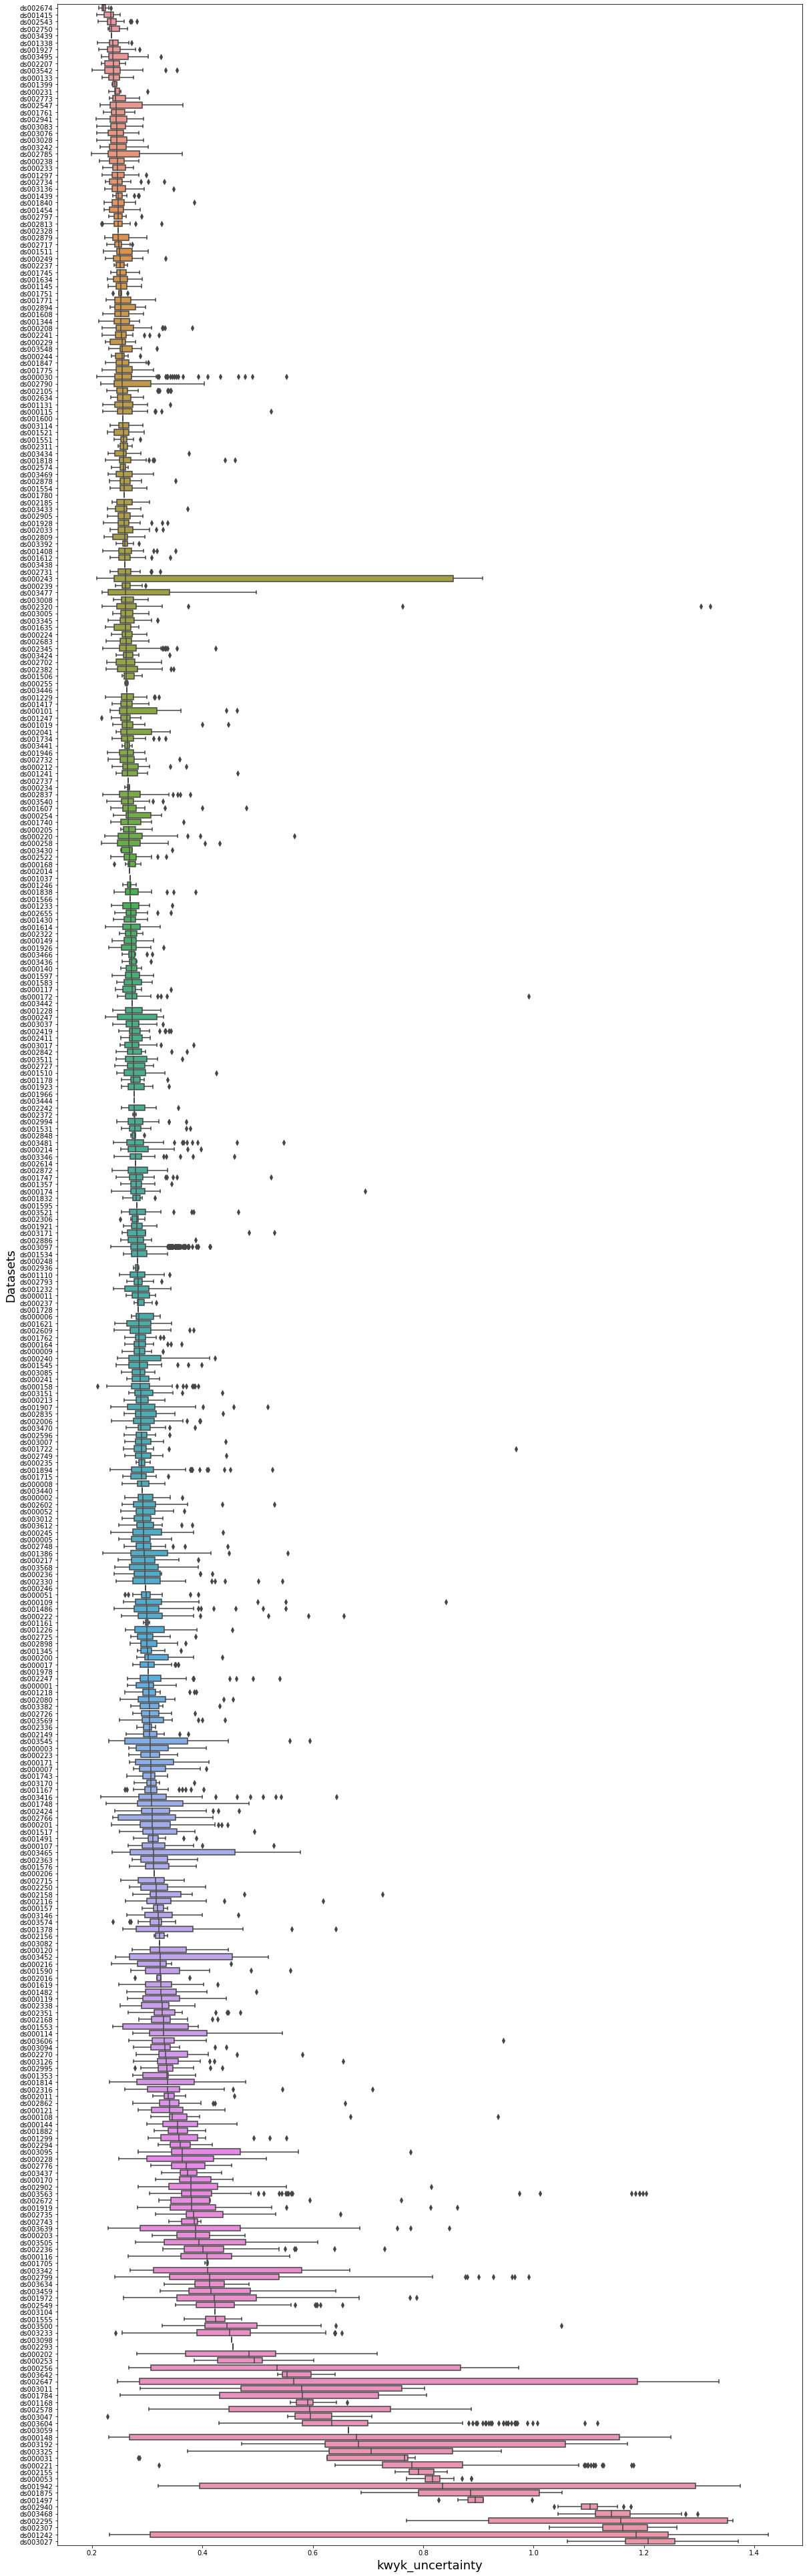

In [15]:
f, ax = plt.subplots(figsize=(20, 70))
sns.boxplot(x="kwyk_uncertainty",y="dataset",data = df, order = sorted_ds)
plt.xlabel("kwyk_uncertainty", size=18)
plt.ylabel("Datasets", size=18)